## Analysis of geographical distribution of older population in LA County
#### Tomohiro Ujikawa  
Our group tries to analyze the discrepancy between public transit needs and current provisions. Older people are one of the populations that need transportation infrastructure, which is focused on revealing their geographical distribution.

In [1]:
import pandas as pd

#### load a data file and changing data type of FIPS into strings for leading zeros

In [2]:
#dtype ensures that the columns are read in as strings for leading zeros
df3 = pd.read_csv(
    'Data/means_of_commute.csv',
    dtype=
    {
        'FIPS':str,
    }
)
# dtype is the function is used for rewriting dictionary

/tmp/ipykernel_1696/1874007201.py:2: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,197,199,201,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,271,272,277,278,283,284,289,290,295,296,301,302,307,308,313,314,319,320,325,326,331,332,337,338,343,344,349,350,355,356,361,362,373,374,379,380,385,386,391,392,397,398,403,404,409,410,415,416,457,458,463,464,469,470,475,476,481,482,487,488,493,494,499,500,505,506,511,512,517,518,523,524,529,53

#### checking data types again and make sure the FIPS is converted to strings

In [3]:
df3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 811 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    GEO_ID          2346 non-null   object 
 1    FIPS            2346 non-null   object 
 2    NAME            2346 non-null   object 
 3    S0802_C01_001E  2346 non-null   int64  
 4    S0802_C01_001M  2346 non-null   int64  
 5    S0802_C01_002E  2346 non-null   object 
 6    S0802_C01_002M  2346 non-null   object 
 7    S0802_C01_003E  2346 non-null   object 
 8    S0802_C01_003M  2346 non-null   object 
 9    S0802_C01_004E  2346 non-null   object 
 10   S0802_C01_004M  2346 non-null   object 
 11   S0802_C01_005E  2346 non-null   object 
 12   S0802_C01_005M  2346 non-null   object 
 13   S0802_C01_006E  2346 non-null   object 
 14   S0802_C01_006M  2346 non-null   object 
 15   S0802_C01_007E  2346 non-null   object 
 16   S0802_C01_007M  2346 non-null   object 
 17   S0802_C01_00

#### creating new dataframe including data to be used

In [4]:
# define columns to keep; you will have to look at your source's metadata to determine which columns to keep and what they mean
columns_to_keep2 = ['FIPS',
                   'S0802_C04_098E',]
# add it to a new dataframe
df4 = df3[columns_to_keep2]
# this function creates a new data frame

In [5]:
df4.columns = ['FIPS',
'Percentage of public transportation',]
# change the column names to common language

#### checking the list of columns

In [6]:
columns = list(df4) 
columns

['FIPS', 'Percentage of public transportation']

In [7]:
df4.sample(5)

FIPS  Percentage of public transportation
1819  06037570003                                 1.21
600   06037212204                                41.93
1243  06037408303                                 0.00
959   06037294520                                 3.86
1604  06037533901                                 5.50

#### checking the data types again in the new dataframe

In [8]:
# look at the data types, verbose = True shows us all the counts
df4.info(verbose=True, show_counts=True)
# we can find which columns lack data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FIPS                                 2346 non-null   object 
 1   Percentage of public transportation  2346 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.8+ KB


#### checking some statistical characteristics of this data

In [9]:
# get some stats
df4['Percentage of public transportation'].describe()

count    2346.000000
mean        6.329344
std         7.348267
min         0.000000
25%         1.830000
50%         3.915000
75%         8.017500
max        72.520000
Name: Percentage of public transportation, dtype: float64

#### plot it as a historgram with 50 bins

<Axes: ylabel='Frequency'>

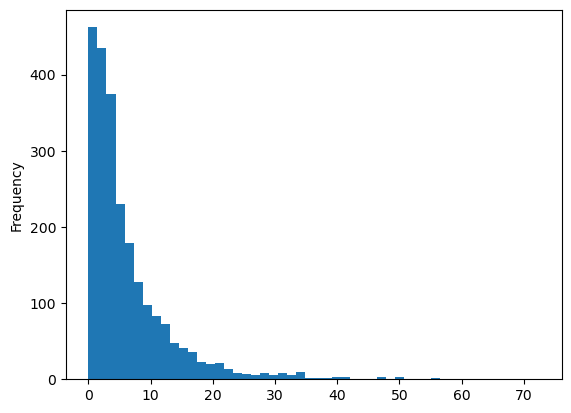

In [10]:
df4['Percentage of public transportation'].plot.hist(bins=50)

#### loading geodata

In [11]:
import geopandas as gpd

# Load the census tracts GeoDataFrame (read in a geojson file downloaded from the LA Times)
tracts = gpd.read_file('Data/Census_Tracts_2020.geojson')

# Load the city GeoDataFrame 
city = gpd.read_file('Data/LA_city_boundaries.geojson')

# Load the neighborhood GeoDataFrame 
neighborhoods = gpd.read_file('Data/LA_neighborhood_boundaries.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


#### picking up the data to be used

In [12]:
tracts = tracts[['CT20','geometry']]
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CT20      2495 non-null   object  
 1   geometry  2495 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 39.1+ KB


#### create a FIPS column

In [13]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

CT20                                           geometry         FIPS
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

### creating new geodataframe of LA city

In [14]:
# clipping with geopandas
# Select the desired cities
selected_cities = city[city['CITY_NAME'].isin(['Los Angeles'])]

# Create a new GeoDataFrame
new_gdf = gpd.GeoDataFrame(selected_cities)

# Clipping census tracts to selected_cities. Clip will select tracts
tractscities = gpd.clip(tracts, selected_cities)
tractscities

CT20                                           geometry         FIPS
1037  276606  POLYGON ((-118.43857 33.95600, -118.43621 33.9...  06037276606
1036  276605  POLYGON ((-118.43330 33.95709, -118.43323 33.9...  06037276605
1039  276608  POLYGON ((-118.42698 33.95433, -118.42720 33.9...  06037276608
1045  278102  POLYGON ((-118.43358 33.97428, -118.43355 33.9...  06037278102
1035  276601  POLYGON ((-118.43227 33.97502, -118.43223 33.9...  06037276601
...      ...                                                ...          ...
15    103300  POLYGON ((-118.34519 34.26790, -118.34500 34.2...  06037103300
2479  980021  POLYGON ((-118.36152 34.27224, -118.36030 34.2...  06037980021
21    104124  MULTIPOLYGON (((-118.38296 34.29333, -118.3829...  06037104124
45    106113  POLYGON ((-118.41970 34.30684, -118.41857 34.3...  06037106113
43    106111  POLYGON ((-118.41359 34.32989, -118.41237 34.3...  06037106111

[1289 rows x 3 columns]

#### check the information about this dataset

In [15]:
tractscities.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1289 entries, 1037 to 43
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CT20      1289 non-null   object  
 1   geometry  1289 non-null   geometry
 2   FIPS      1289 non-null   object  
dtypes: geometry(1), object(2)
memory usage: 40.3+ KB


#### spatial join

In [16]:
# Perform the spatial join
result = gpd.sjoin(tracts, city, how='inner', op='within')

# Print the result
print(result)

        CT20                                           geometry         FIPS  \
0     101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1     101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2     101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   
3     101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   
4     101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222   
...      ...                                                ...          ...   
2450  920332  POLYGON ((-118.53594 34.39170, -118.53599 34.3...  06037920332   
2451  920334  POLYGON ((-118.55201 34.39517, -118.55214 34.3...  06037920334   
2454  920340  POLYGON ((-118.53982 34.37976, -118.53949 34.3...  06037920340   
2455  920341  POLYGON ((-118.52407 34.37583, -118.52447 34.3...  06037920341   
2456  920342  POLYGON ((-118.52471 34.38013, -118.52477 34.3...  06037920342   

      index_right  OBJECTID      CITY_N

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


### merging census data (overall LA county) with geodata that only include LA cities and create clipped data

In [17]:
# FIPS must be used as strings!!
# create a new dataframe based on the join
tracts_transportation=tractscities.merge(df4,on="FIPS")
# on="FIPS" means "merge based on FIPS"

tracts_transportation.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   CT20                                 1036 non-null   object  
 1   geometry                             1036 non-null   geometry
 2   FIPS                                 1036 non-null   object  
 3   Percentage of public transportation  1036 non-null   float64 
dtypes: float64(1), geometry(1), object(2)
memory usage: 32.5+ KB


#### mappint out the census data

<Axes: >

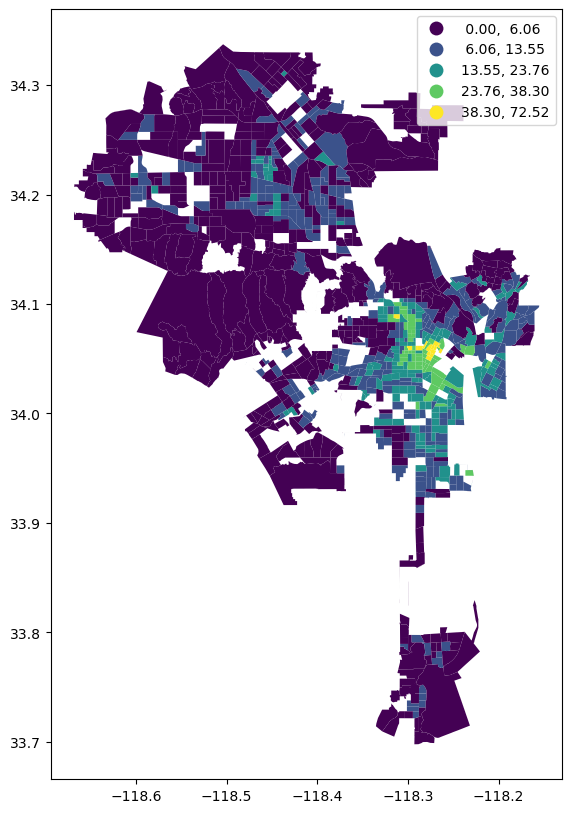

In [18]:
tracts_transportation.plot(figsize=(12,10),
                 column='Percentage of public transportation',
                 legend=True, 
                 scheme='NaturalBreaks')

#### importing/saving the created map

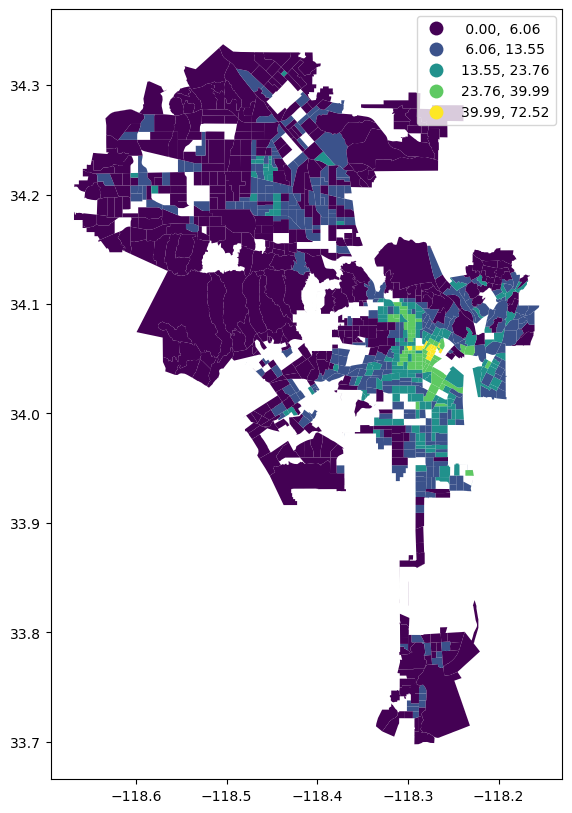

In [19]:
import matplotlib.pyplot as plt
ax = tracts_transportation.plot(figsize=(12,10),
                 column='Percentage of public transportation',
                 legend=True, 
                 scheme='NaturalBreaks')
ax.figure.savefig('PercentagePublicTransportation.png')

In [20]:
tracts_transportation['PCT_transportation'] = tracts_transportation['Percentage of public transportation']

#add empty folium map 
import folium 
m = folium.Map(location=[34.051850, -118.243322], tiles=None)

folium.raster_layers.TileLayer(
    location=[34.051850, -118.243322],
    tiles='https://api.mapbox.com/styles/v1/cgiamarino/ckh3zcblc09pp19n0adewnboh/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    attr='Mapbox',
    API_key='pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    name='Monochrome',
    zoom_start=9  # Limited levels of zoom for free Mapbox tiles.
).add_to(m)


#create choropleth
folium.Choropleth(
    geo_data=tracts_transportation,
    name='SVI',
    data=tracts_transportation,
    popup=tracts_transportation.PCT_transportation,
    columns=['FIPS', 'PCT_transportation'],
    fill_color='PuRd',
    key_on='feature.properties.FIPS',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Social Vulnerability Index (SVI)'
).add_to(m)

#create feature group so that business layer can be added to drop down
f2=folium.FeatureGroup(name='Business Closures').add_to(m)

# add the businesses to the feature group
for index, row in df_map.iterrows():
    folium.Circle(
        radius=30,
        location=[row.lat,row.lon], 
        popup=row.business_name+ ' '+row.Address, 
        tooltip=row.business_name,
        overlay=False).add_to(f2)
    
folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)


NameError: name 'df_map' is not defined

### mapping data of percentage without vehicle (by clipping LA city data)

In [21]:
tracts2=gpd.read_file('Data/Without_Vehicle.geojson')
tracts2.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   tract                2495 non-null   object  
 1   no_vehicle           2495 non-null   int64   
 2   no_vehicle_universe  2495 non-null   int64   
 3   no_vehicle_pct       2471 non-null   float64 
 4   sup_dist             2495 non-null   object  
 5   csa                  2495 non-null   object  
 6   spa                  2495 non-null   object  
 7   ESRI_OID             2495 non-null   int64   
 8   Shape__Area          2495 non-null   float64 
 9   Shape__Length        2495 non-null   float64 
 10  geometry             2495 non-null   geometry
dtypes: float64(3), geometry(1), int64(3), object(4)
memory usage: 214.5+ KB


In [22]:
# returns list of columns 
columns2 = list(tracts2) # this is the same as df.columns.to_list()
columns2

['tract',
 'no_vehicle',
 'no_vehicle_universe',
 'no_vehicle_pct',
 'sup_dist',
 'csa',
 'spa',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [23]:
tracts2.columns = ['FIPS',
 'no_vehicle',
 'no_vehicle_universe',
 'Percentage of without vehicle',
 'sup_dist',
 'csa',
 'spa',
 'ESRI_OID',
 'Shape__Area',
 'Shape__Length',
 'geometry']
# change the column names to common language

In [24]:
# changing dataframe into a dataframe with only necessary columns
tracts2 = tracts2[['FIPS','Percentage of without vehicle','geometry']]

In [25]:
# FIPS must be used as strings!!
# create a new dataframe based on the join
tracts_combined=tracts2.merge(df4,on="FIPS")
# on="FIPS" means "merge based on FIPS"
tracts_combined.head()

FIPS  Percentage of without vehicle  \
0  06037101110                           12.9   
1  06037101122                            0.7   
2  06037101220                            5.4   
3  06037101300                            2.6   
4  06037101400                           14.0   

                                            geometry  \
0  POLYGON ((-118.30077 34.25961, -118.30077 34.2...   
1  POLYGON ((-118.30321 34.27334, -118.29971 34.2...   
2  POLYGON ((-118.28594 34.25228, -118.28594 34.2...   
3  POLYGON ((-118.27824 34.25166, -118.27693 34.2...   
4  POLYGON ((-118.32239 34.24964, -118.31672 34.2...   

   Percentage of public transportation  
0                                 2.39  
1                                 0.00  
2                                 3.64  
3                                 4.21  
4                                 2.85

In [26]:
tracts3=gpd.read_file('Data/Walkability_2012.geojson')
tracts3.info(verbose=True, show_counts=True)
tracts3.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1003 non-null   int64   
 1   TOT_SQFT    1003 non-null   int64   
 2   GEOID10     1003 non-null   object  
 3   GEOID10_1   1003 non-null   object  
 4   LU_Diversi  1003 non-null   float64 
 5   LUDiv_Z     1003 non-null   float64 
 6   Intersecti  1003 non-null   float64 
 7   Inter_Z     1003 non-null   float64 
 8   Ret_Den     1003 non-null   float64 
 9   Ret_Z       1003 non-null   float64 
 10  Res_Den     1003 non-null   float64 
 11  Res_Z       1003 non-null   float64 
 12  Walkabilit  1003 non-null   float64 
 13  Walkabil_1  1003 non-null   float64 
 14  geometry    1003 non-null   geometry
dtypes: float64(10), geometry(1), int64(2), object(2)
memory usage: 117.7+ KB


OBJECTID  TOT_SQFT      GEOID10    GEOID10_1  LU_Diversi   LUDiv_Z  \
0         1  61700812  06037106510  06037106510    0.286888 -0.969699   
1         2  22445154  06037106406  06037106406    0.453006  0.161020   
2         3  27135797  06037106010  06037106010    0.415851 -0.091883   
3         4  21722443  06037106020  06037106020    0.234912 -1.323478   
4         5  41192667  06037106111  06037106111    0.401389 -0.190325   

   Intersecti   Inter_Z   Ret_Den     Ret_Z    Res_Den     Res_Z  Walkabilit  \
0   38.860580 -1.787499  0.322552 -0.437202  28.712246 -0.158316   -3.352716   
1  142.846933 -0.622632  0.360047 -0.422248   7.836378 -0.404323   -1.288183   
2   96.579907 -1.140921  0.000000 -0.565847   3.828881 -0.451548   -2.250198   
3  118.079095 -0.900084  0.000000 -0.565847   4.573557 -0.442773   -3.232182   
4   81.435488 -1.310570  0.000000 -0.565847   4.172580 -0.447498   -2.514240   

   Walkabil_1                                           geometry  
0   -5.140215  POLYGON ((-118.46372 34.31840, -118.46483 34.3...  
1   -1.910814  POLYGON ((-118.45968 34.33003, -118.45965 34.3...  
2   -3.391119  POLYGON ((-118.45968 34.33003, -118.45821 34.3...  
3   -4.132266  POLYGON ((-118.41913 34.32319, -118.42037 34.3...  
4   -3.824810  POLYGON ((-118.41913 34.32319, -118.41739 34.3...

In [27]:
# returns list of columns 
columns3 = list(tracts3) # this is the same as df.columns.to_list()
columns3

['OBJECTID',
 'TOT_SQFT',
 'GEOID10',
 'GEOID10_1',
 'LU_Diversi',
 'LUDiv_Z',
 'Intersecti',
 'Inter_Z',
 'Ret_Den',
 'Ret_Z',
 'Res_Den',
 'Res_Z',
 'Walkabilit',
 'Walkabil_1',
 'geometry']

In [28]:
tracts3.columns = ['OBJECTID',
 'TOT_SQFT',
 'FIPS',
 'GEOID10_1',
 'LU_Diversi',
 'LUDiv_Z',
 'Intersecti',
 'Inter_Z',
 'Ret_Den',
 'Ret_Z',
 'Res_Den',
 'Res_Z',
 'Walkability',
 'Walkabil_1',
 'geometry']
# change the column names to common language

In [30]:
# changing dataframe into a dataframe with only necessary columns
tracts3 = tracts3[['FIPS','Walkability']]

In [31]:
# FIPS must be used as strings!!
# create a new dataframe based on the join
tracts_combined2=tracts3.merge(tracts_combined,on="FIPS")
# on="FIPS" means "merge based on FIPS"
tracts_combined2.info(verbose=True, show_counts=True)

# number of data decreased because walkability is only available for LA city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   FIPS                                 890 non-null    object  
 1   Walkability                          890 non-null    float64 
 2   Percentage of without vehicle        883 non-null    float64 
 3   geometry                             890 non-null    geometry
 4   Percentage of public transportation  890 non-null    float64 
dtypes: float64(3), geometry(1), object(1)
memory usage: 34.9+ KB


In [32]:
tracts_combined2.to_csv('tracts2.csv')

In [ ]:
tracts_combined2.plot.scatter(x='Walkability',y='Percentage of public transportation')

In [ ]:
tracts_combined2.plot.scatter(x='Percentage of without vehicle',y='Walkability')

In [ ]:
# Clipping census tracts to selected_cities. Clip will select tracts
tracts2cities = gpd.clip(tracts2, selected_cities)
tracts2cities

In [ ]:
tracts2cities.plot(figsize=(12,10),
                 column='Percentage of without vehicle',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
ax2 = tracts2cities.plot(figsize=(12,10),
                 column='Percentage of without vehicle',
                 legend=True, 
                 scheme='NaturalBreaks')
ax2.figure.savefig('PercentageWithoutVehicle.png')

In [ ]:
# returns list of columns 
columns3 = list(tracts3) # this is the same as df.columns.to_list()
columns3

In [ ]:
tracts3.columns = ['OBJECTID',
 'TOT_SQFT',
 'GEOID10',
 'GEOID10_1',
 'LU_Diversi',
 'LUDiv_Z',
 'Intersecti',
 'Inter_Z',
 'Ret_Den',
 'Ret_Z',
 'Res_Den',
 'Res_Z',
 'Walkability',
 'Walkabil_1',
 'geometry']
# change the column names to common language

In [ ]:
tracts3.plot(figsize=(12,10),
                 column='Walkability',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
ax3 = tracts3.plot(figsize=(12,10),
                 column='Walkability',
                 legend=True, 
                 scheme='NaturalBreaks')
ax3.figure.savefig('Walkability.png')